# <span style="color:darkblue"> Lecture 3c: Transform </span>

<font size = "5">

This is a complement to Lecture 3b


# <span style="color:darkblue"> I. Import Libraries and Data </span>


<font size = "5">
Key libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
results = pd.read_csv("data_raw/results.csv")

# <span style="color:darkblue"> II. Transform + Groupby </span>



<font size = "5">

Adding columns with grouped aggregate statistics

<img src="figures/transform_stats.png" alt="drawing" width="300"/>


In [7]:
# We've use "transform" to compute a column with aggregate statistics
# If we add the pipe "groupby" the aggregate statistics are computed by group
# with group level averages.
# We can use any aggregate function, including "mean", "std", "max","min", etc.

results["mean_points_driver"] = results.groupby("driverId")["points"].transform("mean")
results["std_points_driver"]  = results.groupby("driverId")["points"].transform("std")

results


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,mean_points_driver,std_points_driver
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,14.182258,9.224098
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,1.407609,2.372923
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,7.740291,8.672456
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,5.756983,6.330721
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,0.937500,1.969503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11,0.272727,1.335798
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11,1.260563,2.771894
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9,14.182258,9.224098
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130,0.147541,0.813143


<font size = "5">

Computing the rank


In [11]:
# The rank function calculates the relative position
# The option 'method = "dense"' options gives multiple individuals
# the same rank if there is a tie
# The option 'ascending = False' indicates the the person with the lowest
# score is "1", the second lowest is "2", etc.

results["rank_points"] = results["points"].rank(method = "dense",
                                                ascending = False)

results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,mean_points_driver,std_points_driver,rank_points,rank_points_withinteam
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,14.182258,9.224098,16.0,13.0
1,2,18,2,2,3,5,2,2,2,8.0,...,5696094,41,3,1:27.739,217.586,1,1.407609,2.372923,20.0,8.0
2,3,18,3,3,7,7,3,3,3,6.0,...,5698779,41,5,1:28.090,216.719,1,7.740291,8.672456,25.0,9.0
3,4,18,4,4,5,11,4,4,4,5.0,...,5707797,58,7,1:28.603,215.464,1,5.756983,6.330721,26.0,6.0
4,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,0.937500,1.969503,29.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,\N,39,12,1:29.833,211.632,11,0.272727,1.335798,39.0,1.0
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,\N,40,20,1:31.158,208.556,11,1.260563,2.771894,39.0,1.0
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,\N,42,11,1:29.788,211.738,9,14.182258,9.224098,39.0,1.0
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,\N,45,14,1:30.309,210.517,130,0.147541,0.813143,39.0,1.0


Text(0.5, 0, 'Relative Ranking')

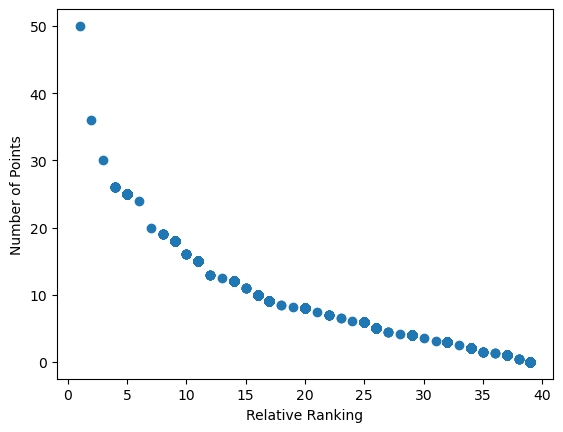

In [ ]:
# The graph shows that the winner gets 50 points
plt.scatter(x = results["rank_points"],y = results["points"])
plt.ylabel("Number of Points")
plt.xlabel("Relative Ranking")

<font size = "5">

Computing the rank by group

In [ ]:
# The subfunction "transform" allows us to pass-along some of the options

results["rank_points_withinteam"] = (results.groupby("constructorId")["points"]
                                            .transform("rank",
                                                       method = "dense",
                                                       ascending = True))

results